In [1]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [3]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'cat_dog_data_small/train'
validation_dir = 'cat_dog_data_small/validation'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, data_labels in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', data_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 150, 150, 3)


In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 13s 132ms/step - loss: 0.6907 - acc: 0.5315 - val_loss: 0.6755 - val_acc: 0.5650
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6587 - acc: 0.6160 - val_loss: 0.6670 - val_acc: 0.5740
Epoch 3/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6201 - acc: 0.6610 - val_loss: 0.6317 - val_acc: 0.6320
Epoch 4/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5793 - acc: 0.6895 - val_loss: 0.6150 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5380 - acc: 0.7265 - val_loss: 0.6432 - val_acc: 0.6380
Epoch 6/30
100/100 [==============================] - 12s 117ms/step - loss: 0.5072 - acc: 0.7450 - val_loss: 0.5791 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 12s 118ms/step - loss: 0.4797 - acc: 0.7760 - val_loss: 0.6023 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 1

In [10]:
model.save('cats_and_dogs_small_1.h5')

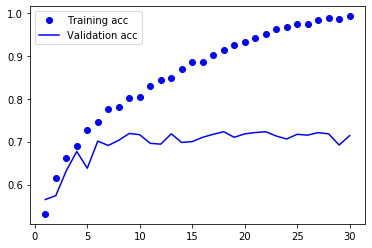

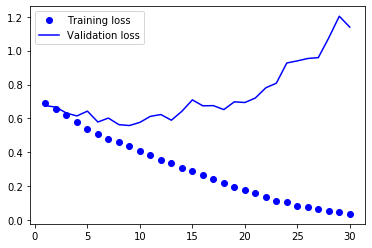

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()